In [1]:
import pytesseract

# Đường dẫn đến tesseract.exe, thay đổi nếu cần
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Kiểm tra phiên bản của Tesseract
!tesseract --version


tesseract v5.4.0.20240606
 leptonica-1.84.1
  libgif 5.2.1 : libjpeg 8d (libjpeg-turbo 3.0.1) : libpng 1.6.43 : libtiff 4.6.0 : zlib 1.3 : libwebp 1.4.0 : libopenjp2 2.5.2
 Found AVX2
 Found AVX
 Found FMA
 Found SSE4.1
 Found libarchive 3.7.4 zlib/1.3.1 liblzma/5.6.1 bz2lib/1.0.8 liblz4/1.9.4 libzstd/1.5.6


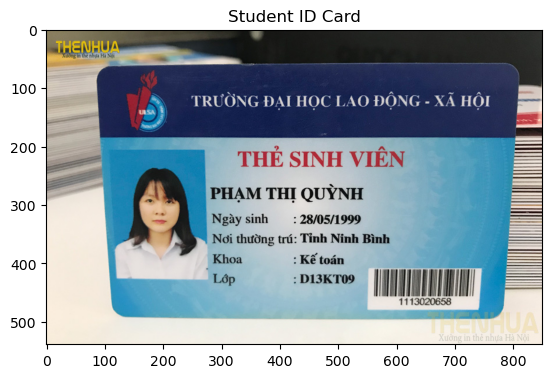

Thông tin trên thẻ sinh viên:
THE SINH VIEN

PHAM THI QUYNH
Ngay sinh : 28/05/1999

Noi thudng tré: Tinh Ninh Binh
Khoa : Ké toan

vo pscrosAMDIMIL

1113020658



In [2]:
import cv2
from matplotlib import pyplot as plt

# Đọc ảnh thẻ sinh viên
card_image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\R.jpg"
card_image = cv2.imread(card_image_path)

# Hiển thị ảnh
plt.imshow(cv2.cvtColor(card_image, cv2.COLOR_BGR2RGB))
plt.title('Student ID Card')
plt.show()

# Sử dụng Tesseract OCR để trích xuất văn bản từ ảnh
card_text = pytesseract.image_to_string(card_image)
print("Thông tin trên thẻ sinh viên:")
print(card_text)

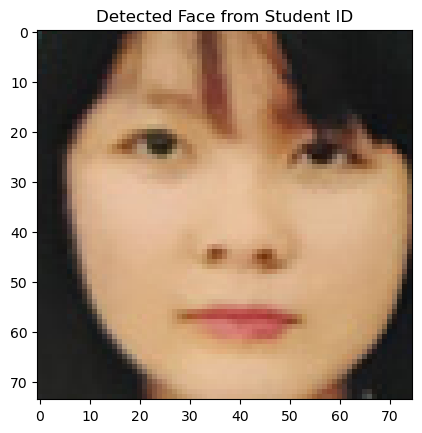

TypeError: compute_face_descriptor(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], face: _dlib_pybind11.full_object_detection, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vector
    2. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], num_jitters: int = 0) -> _dlib_pybind11.vector
    3. (self: _dlib_pybind11.face_recognition_model_v1, img: numpy.ndarray[(rows,cols,3),numpy.uint8], faces: _dlib_pybind11.full_object_detections, num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectors
    4. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: list[numpy.ndarray[(rows,cols,3),numpy.uint8]], batch_faces: list[_dlib_pybind11.full_object_detections], num_jitters: int = 0, padding: float = 0.25) -> _dlib_pybind11.vectorss
    5. (self: _dlib_pybind11.face_recognition_model_v1, batch_img: list[numpy.ndarray[(rows,cols,3),numpy.uint8]], num_jitters: int = 0) -> _dlib_pybind11.vectors

Invoked with: <_dlib_pybind11.face_recognition_model_v1 object at 0x000001EF9C9A43B0>, array([[[59, 59, 41],
        [29, 29, 41],
        [28, 34, 29],
        ...,
        [34, 31, 26],
        [34, 31, 27],
        [29, 29, 29]],

       [[51, 52, 36],
        [31, 34, 25],
        [28, 33, 31],
        ...,
        [30, 31, 27],
        [30, 31, 27],
        [27, 28, 26]],

       [[39, 41, 29],
        [27, 31, 25],
        [27, 32, 30],
        ...,
        [28, 29, 25],
        [29, 30, 26],
        [28, 29, 27]],

       ...,

       [[35, 37, 37],
        [34, 36, 36],
        [34, 36, 36],
        ...,
        [27, 28, 26],
        [26, 27, 25],
        [26, 27, 25]],

       [[34, 36, 36],
        [33, 35, 35],
        [33, 35, 35],
        ...,
        [23, 26, 24],
        [23, 26, 24],
        [24, 27, 25]],

       [[39, 39, 39],
        [36, 36, 36],
        [34, 36, 36],
        ...,
        [24, 25, 23],
        [25, 25, 25],
        [25, 25, 25]]], dtype=uint8), <_dlib_pybind11.full_object_detection object at 0x000001EF9FC0E830>, 1

In [3]:
import cv2
import face_recognition
from matplotlib import pyplot as plt

# Đọc ảnh thẻ sinh viên
card_image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\R.jpg"
card_image = cv2.imread(card_image_path)

# Tìm khuôn mặt trong ảnh thẻ sinh viên
card_face_locations = face_recognition.face_locations(card_image)

# Kiểm tra nếu tìm thấy ít nhất một khuôn mặt
if len(card_face_locations) > 0:
    # Chỉ lấy khuôn mặt đầu tiên tìm thấy
    top, right, bottom, left = card_face_locations[0]

    # Cắt ảnh khuôn mặt ra từ ảnh thẻ
    card_face_image = card_image[top:bottom, left:right]

    # Hiển thị khuôn mặt cắt ra từ ảnh thẻ
    plt.imshow(cv2.cvtColor(card_face_image, cv2.COLOR_BGR2RGB))
    plt.title('Detected Face from Student ID')
    plt.show()

    # Mã hóa khuôn mặt từ ảnh thẻ để so sánh
    card_face_encoding = face_recognition.face_encodings(card_face_image)[0]
else:
    print("Không tìm thấy khuôn mặt trong ảnh thẻ sinh viên.")

# Đọc ảnh khuôn mặt từ file được tải lên
live_image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\R.jpg"
live_image = cv2.imread(live_image_path)

# Hiển thị ảnh được tải lên
plt.imshow(cv2.cvtColor(live_image, cv2.COLOR_BGR2RGB))
plt.title('Live Face Image')
plt.show()

# Mã hóa khuôn mặt từ ảnh tải lên
live_face_encoding = face_recognition.face_encodings(live_image)[0]

# So sánh hai khuôn mặt
results = face_recognition.compare_faces([card_face_encoding], live_face_encoding)
print(f"Kết quả so sánh khuôn mặt: {results[0]}")


In [ ]:
pip install --upgrade dlib
pip install --upgrade face_recognition

In [ ]:
import cv2
import face_recognition
from matplotlib import pyplot as plt

# Đọc ảnh từ thẻ sinh viên và ảnh khuôn mặt tải lên
card_image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\R.jpg"
live_image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\R.jpg"

# Đọc ảnh từ tệp
card_image = cv2.imread(card_image_path)
live_image = cv2.imread(live_image_path)

# Chuyển đổi ảnh từ BGR (OpenCV) sang RGB (face_recognition)
card_image_rgb = cv2.cvtColor(card_image, cv2.COLOR_BGR2RGB)
live_image_rgb = cv2.cvtColor(live_image, cv2.COLOR_BGR2RGB)

# Xác định vị trí khuôn mặt trong ảnh thẻ
card_face_locations = face_recognition.face_locations(card_image_rgb)

# Kiểm tra nếu tìm thấy khuôn mặt
if len(card_face_locations) > 0:
    # Cắt khuôn mặt từ ảnh thẻ sinh viên
    top, right, bottom, left = card_face_locations[0]
    card_face_image = card_image_rgb[top:bottom, left:right]
    
    # Hiển thị khuôn mặt cắt từ thẻ sinh viên
    plt.imshow(card_face_image)
    plt.title("Cropped Face from Student Card")
    plt.axis('off')
    plt.show()

    # Lấy mã hóa khuôn mặt từ ảnh thẻ để so sánh
    card_face_encoding = face_recognition.face_encodings(card_face_image)[0]

else:
    print("Không tìm thấy khuôn mặt trong ảnh thẻ sinh viên.")
    card_face_encoding = None

# Xác định vị trí khuôn mặt trong ảnh chụp thực tế
live_face_locations = face_recognition.face_locations(live_image_rgb)

# Kiểm tra nếu tìm thấy khuôn mặt
if len(live_face_locations) > 0:
    # Lấy khuôn mặt từ ảnh chụp thực tế
    top, right, bottom, left = live_face_locations[0]
    live_face_image = live_image_rgb[top:bottom, left:right]

    # Hiển thị khuôn mặt từ ảnh thực tế
    plt.imshow(live_face_image)
    plt.title("Live Face Image")
    plt.axis('off')
    plt.show()

    # Mã hóa khuôn mặt từ ảnh thực tế
    live_face_encoding = face_recognition.face_encodings(live_face_image)[0]

    # So sánh khuôn mặt
    if card_face_encoding is not None:
        results = face_recognition.compare_faces([card_face_encoding], live_face_encoding)
        print(f"Kết quả so sánh khuôn mặt: {results[0]}")
    else:
        print("Không thể so sánh vì không tìm thấy khuôn mặt trong ảnh thẻ sinh viên.")

else:
    print("Không tìm thấy khuôn mặt trong ảnh thực tế.")


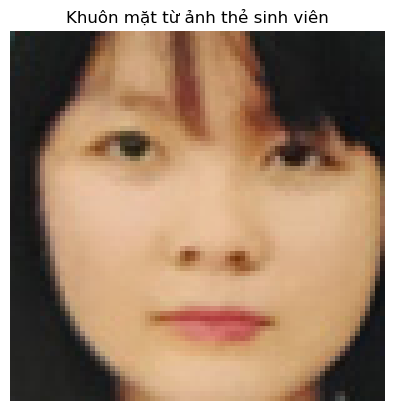

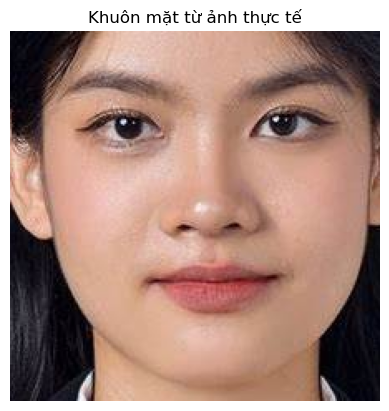

In [13]:
import cv2
import face_recognition
from matplotlib import pyplot as plt

# Đọc ảnh từ thẻ sinh viên và ảnh khuôn mặt tải lên
card_image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\R.jpg"
live_image_path = r"D:\Edu\Python\StudentID_FaceVerification\student-id-face-matching\face.jpg"

# Đọc ảnh từ tệp
card_image = cv2.imread(card_image_path)
live_image = cv2.imread(live_image_path)

# Chuyển đổi ảnh từ BGR (OpenCV) sang RGB (face_recognition)
card_image_rgb = cv2.cvtColor(card_image, cv2.COLOR_BGR2RGB)
live_image_rgb = cv2.cvtColor(live_image, cv2.COLOR_BGR2RGB)

# Xác định vị trí khuôn mặt trong ảnh thẻ
card_face_locations = face_recognition.face_locations(card_image_rgb)

# Kiểm tra nếu tìm thấy khuôn mặt
if len(card_face_locations) > 0:
    # Cắt khuôn mặt từ ảnh thẻ
    top, right, bottom, left = card_face_locations[0]
    card_face_image = card_image_rgb[top:bottom, left:right]

    # Hiển thị ảnh khuôn mặt đã cắt
    plt.imshow(card_face_image)
    plt.title('Khuôn mặt từ ảnh thẻ sinh viên')
    plt.axis('off')
    plt.show()

else:
    print("Không tìm thấy khuôn mặt trong ảnh thẻ sinh viên.")

# Xác định vị trí khuôn mặt trong ảnh thực tế
live_face_locations = face_recognition.face_locations(live_image_rgb)

# Kiểm tra nếu tìm thấy khuôn mặt
if len(live_face_locations) > 0:
    # Cắt khuôn mặt từ ảnh thực tế
    top, right, bottom, left = live_face_locations[0]
    live_face_image = live_image_rgb[top:bottom, left:right]

    # Hiển thị ảnh khuôn mặt đã cắt
    plt.imshow(live_face_image)
    plt.title('Khuôn mặt từ ảnh thực tế')
    plt.axis('off')
    plt.show()

else:
    print("Không tìm thấy khuôn mặt trong ảnh thực tế.")


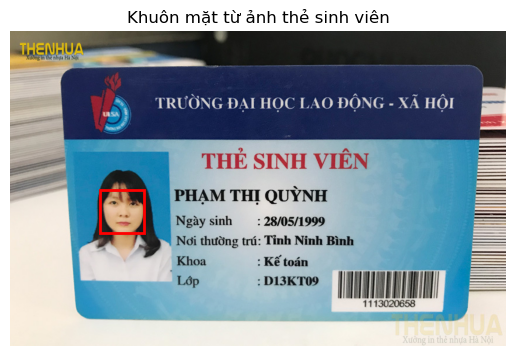

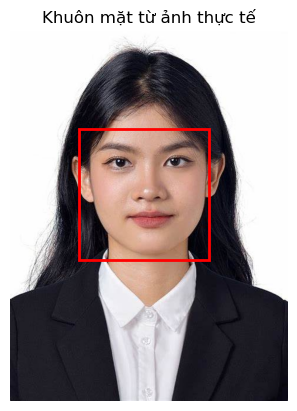

Khuôn mặt khớp! (Độ chính xác: 0.57)


In [21]:
import face_recognition
import cv2
from matplotlib import pyplot as plt

def display_face(image, title, face_locations):
    """Hiển thị khuôn mặt đã cắt từ ảnh và vẽ hình chữ nhật quanh khuôn mặt."""
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

    # Vẽ hình chữ nhật quanh khuôn mặt
    for (top, right, bottom, left) in face_locations:
        plt.gca().add_patch(plt.Rectangle((left, top), right - left, bottom - top, 
                                            edgecolor='red', linewidth=2, fill=False))
    
    plt.show()

# Chuyển đổi ảnh từ BGR (OpenCV) sang RGB (face_recognition)
card_image_rgb = cv2.cvtColor(card_image, cv2.COLOR_BGR2RGB)
live_image_rgb = cv2.cvtColor(live_image, cv2.COLOR_BGR2RGB)

# Xác định vị trí khuôn mặt trong ảnh thẻ
card_face_locations = face_recognition.face_locations(card_image_rgb)

if len(card_face_locations) > 0:
    # Trích xuất khuôn mặt từ ảnh thẻ
    card_face_encoding = face_recognition.face_encodings(card_image_rgb, known_face_locations=card_face_locations)[0]
    
    # Hiển thị khuôn mặt từ ảnh thẻ với hình chữ nhật
    display_face(card_image_rgb, 'Khuôn mặt từ ảnh thẻ sinh viên', card_face_locations)
else:
    print("Không tìm thấy khuôn mặt trong ảnh thẻ sinh viên.")

# Xác định vị trí khuôn mặt trong ảnh thực tế
live_face_locations = face_recognition.face_locations(live_image_rgb)

if len(live_face_locations) > 0:
    # Trích xuất đặc trưng khuôn mặt từ ảnh thực tế
    live_face_encoding = face_recognition.face_encodings(live_image_rgb, known_face_locations=live_face_locations)[0]
    
    # Hiển thị khuôn mặt từ ảnh thực tế với hình chữ nhật
    display_face(live_image_rgb, 'Khuôn mặt từ ảnh thực tế', live_face_locations)
else:
    print("Không tìm thấy khuôn mặt trong ảnh thực tế.")

# So sánh đặc trưng khuôn mặt giữa hai ảnh
if 'card_face_encoding' in locals() and 'live_face_encoding' in locals():
    results = face_recognition.compare_faces([card_face_encoding], live_face_encoding)
    face_distance = face_recognition.face_distance([card_face_encoding], live_face_encoding)[0]

    if results[0]:
        print(f"Khuôn mặt khớp! (Độ chính xác: {1 - face_distance:.2f})")
    else:
        print(f"Khuôn mặt không khớp! (Độ chính xác: {1 - face_distance:.2f})")
else:
    print("Không thể so sánh khuôn mặt do thiếu mã hóa khuôn mặt.")
